In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = [12, 8]

# $\star$ Question 1:
Load the points from pca.mat and project them to a 1D subspace via PCA. 

Visualize the original points, the linear subspace, and the projected points.

Compute the projection error.

(151, 2)


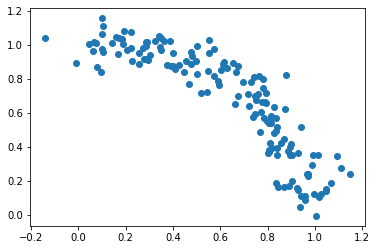

In [2]:
data = np.load('../data/pca.npz', mmap_mode='r')['arr_0']
print(data.shape)
plt.scatter(data[:, 0], data[:, 1])

Projection Error(just using unused eigen values): 0.012413820250563146
Projection Error(sum of squared differences): 1.8744868578350338


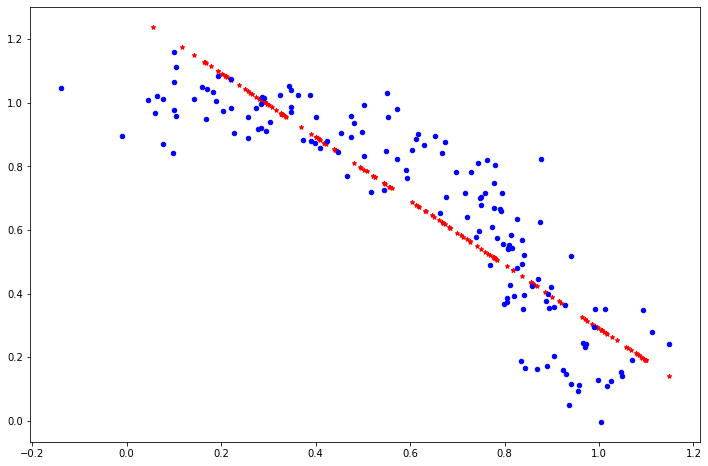

In [79]:
def pca(data, M):
    N = data.shape[0]
    D = data.shape[1]
    mean = np.mean(data, axis=0)
    diff = data - mean
    
    S = (1 / N) * diff.T @ diff # Cov 2 * 2
    eig_val, eig_vec = np.linalg.eig(S)
    
    alpha = np.zeros((N, M))
    eig_val_index = np.argsort(eig_val, -1)[::-1][:M]
    eig_val_idx_removed = np.argsort(eig_val, -1)[::-1][M:D]
    
    eig_vectors_keep = eig_vec.T[eig_val_index]
    
    alpha = diff @ eig_vectors_keep.T
    
    y = mean + alpha @ eig_vectors_keep
    plt.scatter(y[:, 0], y[:, 1], marker='*', s=20, color='r')
    plt.scatter(data[:, 0], data[:, 1], s=20, color='b')
    
    print("Projection Error(just using unused eigen values): {}".format(np.sum(eig_val[eig_val_idx_removed])))
    print("Projection Error(sum of squared differences): {}".format(np.mean(np.sum((data - y) ** 2))))

pca(data, 1)
    

# $\star$ Question 2:
Apply the t-SNE algorithm to the MNIST dataset. You do not need to
implement it yourself, there is a standard sklearn function available.

The data can be downloaded from http://yann.lecun.com/exdb/mnist/, however you can also use https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html to import it directly with the name 'mnist_784'

Try both 2 and 3-dimensional visualization. Use the original images flattened into 1D vectors as high-dimensional features. 

Play around with the perplexity parameter and see how it affects the result.

Apply PCA to the same data and compare the visualizations.

In [32]:
mnist_data = fetch_openml(name='mnist_784')

In [47]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

5


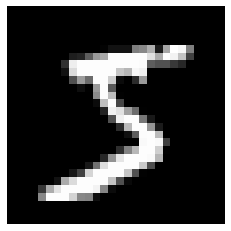

0


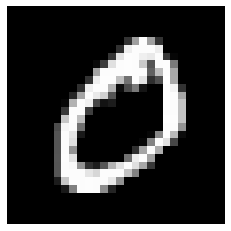

4


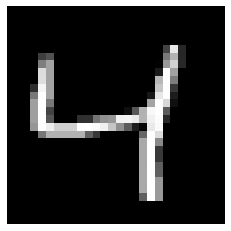

1


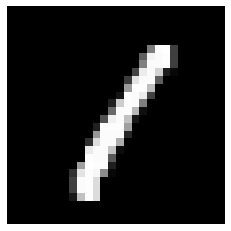

9


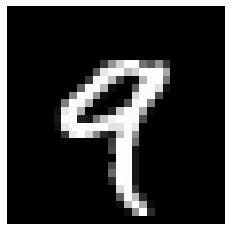

In [64]:
d = mnist_data.data
d = np.asarray(d)
target = mnist_data.target

for i in range(0, 5):
    temp = d[i, :].reshape((28, 28))
#     plt.subplot(331 + 1 + i)
    plt.imshow(temp, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    print(target[i])
    plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(d, target, test_size=0.05)
print(X_train.shape, X_test.shape)

(66500, 784) (3500, 784)


(3500, 2)


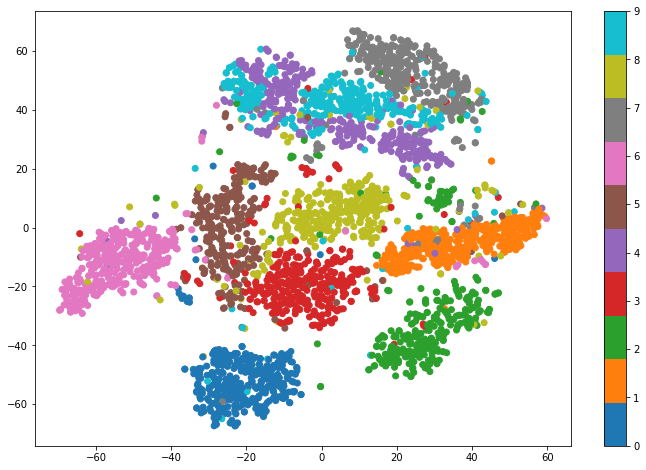

In [74]:
def plot_2d(X, y):
    y_float = y.astype(np.float)
    plt.scatter(X[:, 0], X[:, 1], c=y_float,cmap="tab10")
    plt.colorbar()
    plt.show()
    return

# Use the X_test for a faster T-SNE
tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_test)
print(tsne.shape)

plot_2d(tsne, y_test)

Perplexity = 5


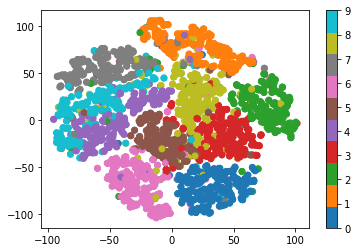

Perplexity = 10


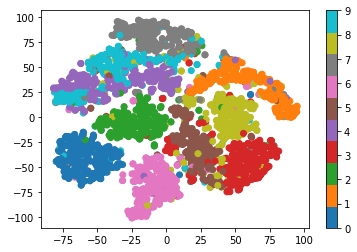

Perplexity = 15


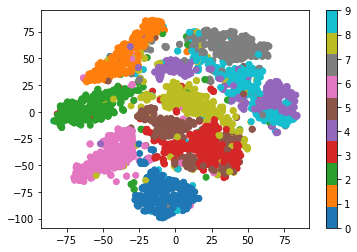

Perplexity = 20


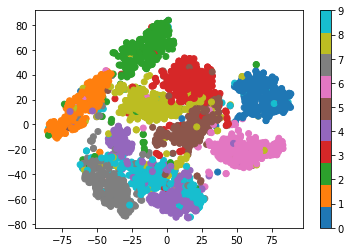

Perplexity = 25


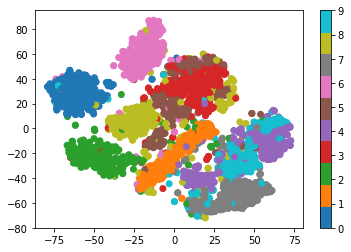

Perplexity = 30


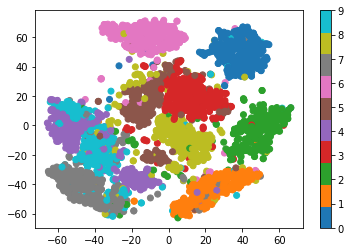

Perplexity = 35


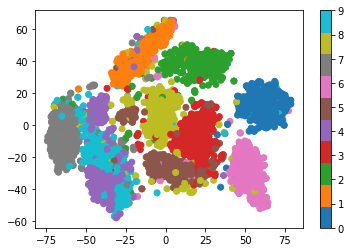

Perplexity = 50


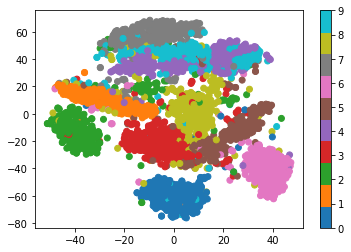

Perplexity = 100


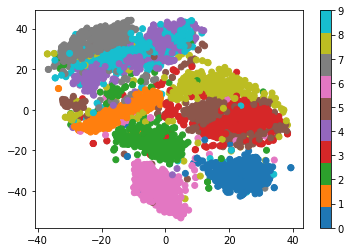

In [62]:
perplexity = [5, 10, 15, 20, 25, 30, 35, 50, 100]
for p in perplexity:
    print("Perplexity = {}".format(p))
    tsne = TSNE(n_components=2, perplexity=p).fit_transform(X_test)
    plot_2d(tsne, y_test)

(3500, 3)


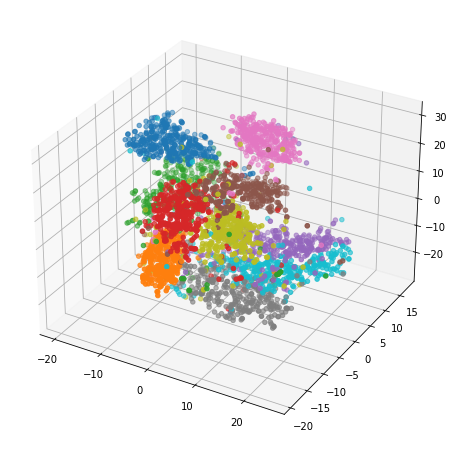

In [76]:
def plot_3d(X, y):
    Y = y.astype(np.float)
    ax = plt.axes(projection ="3d")
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap="tab10")
    plt.show()
    
tsne = TSNE(n_components=3, perplexity=40).fit_transform(X_test)
print(tsne.shape)
plot_3d(tsne, y_test)

(3500, 2)


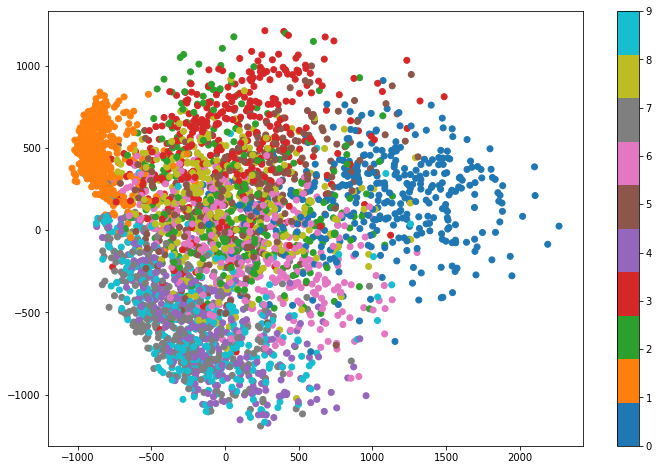

In [73]:
# PCA from sklearn
from sklearn.decomposition import PCA

X_dimReduced = PCA(n_components=2).fit_transform(X_test)
print(X_dimReduced.shape)
plot_2d(X_dimReduced, y_test)